# Home Assignment No. 3: Part 1 
## Not done yet: 1(done, check), 2.1(done,check), 2.2(done,check), 2.3(not done), 3.1(done,check), 3.2(done,check), 4.1(done,check), 4.2(done,check)

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

$
\begin{align}
& p(X|\mu, \tau) = \frac{\tau^{n/2}}{(2\pi)^{n/2}}\exp\Bigl( -\frac{\tau}{2}\sum_{i=1}^n(x_i-\mu)^2 \Bigr) \\
& p(\mu,\tau) = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b)
= \frac{b^a}{\Gamma(a)}\frac{\beta^{1/2}}{(2\pi)^{1/2}}\tau^{a-\frac{1}{2}}e^{-\tau b}\exp\Bigl( -\frac{\tau}{2}\beta(\mu-\mu_0)^2 \Bigr)\\
& p(\mu, \tau|X) \propto p(X|\mu,\tau) p(\mu,\tau) \propto 
\tau^{\frac{n}{2} + a - \frac{1}{2}} e^{-b\tau} \exp\Bigl( -\frac{\tau}{2}\bigl(\beta(\mu-\mu_0)^2 + \sum_{i=1}^n(x_i-\mu)^2 \bigr)\Bigr)\\
& p(\mu, \tau|X) \propto \tau^{\frac{n}{2} + a - \frac{1}{2}} e^{-b\tau} \exp\Bigl( (\beta + n)\bigl(\mu - \frac{\beta\mu_0 + n\bar x}{\beta+n} \bigr)^2 + \frac{\beta n (\bar x - \mu_0)^2}{\beta + n} + \sum_{i=1}^n(x_i-\bar x)^2\Bigr)\\
& p(\mu, \tau|X) \propto \mathcal N \bigl( \mu ; \frac{\beta\mu_0 + n\bar x}{\beta + n}, ((\beta+n)\tau)^{-1}  \bigr) \otimes \text{Gamma}\bigl( \tau ; a + \frac{n}{2}, b + \frac{1}{2}\sum_{i=1}^n(x_i-\bar x)^2 + \frac{\beta n (\bar x - \mu_0)^2}{2(\beta + n)} \bigr)\\
& \text{where } \bar x = \frac{\sum_{i=1}^n x_i}{n} - \text{ mean value of x}\\
\end{align}
$ 

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
### BEGIN Solution

def sigma(w,x):
    return 1/(1 + np.exp(-np.transpose(w)@x))

def p(w):
    x = np.array([2/3, 1/6, 1/6])
    Sigma = np.array([[1, -0.25, 0.75],
                     [-0.25, 1, 0.5],
                     [0.75, 0.5, 2]])
    sig = sigma(w,x)
    Norm = 1/((2*np.pi)**(3/2)*np.sqrt(np.linalg.det(Sigma)))*np.exp(-0.5*np.transpose(w)@np.linalg.inv(Sigma)@w)
    return sig*Norm

def log_p(w):
    return -np.log(p(w))

w = minimize(log_p, np.array([0, 1, 2])).x

H = nd.Hessian(log_p, w)(w)

nd = (2*np.pi)**(3/2) / np.sqrt(np.linalg.det(H)) * p(w)

print('The value of integral: ', nd)
### END Solution

The value of integral:  0.4981120367145024


In [4]:
### BEGIN Solution

### END Solution

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [5]:
import torch
from torch.autograd import Variable, grad

In [6]:
def p(w):
    x = torch.tensor([2/3, 1/6, 1/6])
    Sigma = np.array([[1, -0.25, 0.75],
                     [-0.25, 1, 0.5],
                     [0.75, 0.5, 2]])
    return float(1/((2*np.pi)**(3/2)*np.linalg.det(Sigma)**(1/2)))*torch.sigmoid(torch.dot(w, x))*torch.exp(-0.5*w@Variable(torch.from_numpy(np.linalg.inv(Sigma)).type(torch.FloatTensor))@w)
    
def log_p_torch(w):
    return -torch.log(p(w))

def hessian_dig_torch(func, point):
    theta = Variable(point, requires_grad=True)
    y = func(theta)
    grad_params = torch.autograd.grad(y, theta, create_graph=True)
    hessian = torch.tensor([torch.autograd.grad(grad_params[0][i], theta, create_graph=True)[0].data.numpy() for i in range(theta.size(0))])
    return torch.diag(torch.diag(hessian))

#optimal weights are to be known from 2.1
H_torch = hessian_dig_torch(log_p_torch, torch.FloatTensor(w))

torch = float((2*np.pi)**(3/2) / np.linalg.det(H_torch)**(1/2)) * p(Variable(torch.from_numpy(w).type(torch.FloatTensor))).data.numpy()

print('Integral value is', torch)

Integral value is 0.2964309039805372


In [11]:
### BEGIN Solution

### END Solution

The value of integral:  0.2964309176619787


<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [61]:
print('Integral value using numdifftools =', nd)

print('Integral value using pytorch =', torch)

from scipy.integrate import tplquad

def p_quad(w1, w2, w3):
    w = np.array([w1, w2, w3])
    x = np.array([2/3, 1/6, 1/6])
    S = np.array([[1, -1/4, 3/4],
                 [-1/4, 1, 1/2],
                 [3/4, 1/2, 2]])
    sigma = 1/(1+np.exp(-w.T@x))
    Norm = 1/((2*np.pi)**(3/2)*np.linalg.det(S)**(1/2))*np.exp(-0.5*w.T@np.linalg.inv(S)@w)
    return sigma*Norm

integral_tplquad = tplquad(p_quad, -10, 10, -10, 10, -10, 10)[0]

Integral value using numdifftools = 0.4981120367145024
Integral value using pytorch = 0.2964309039805372


In [62]:
print(round((integral_tplquad - nd)/integral_tplquad,4))

print(round((integral_tplquad - torch)/integral_tplquad,4))




0.0038
0.4071


In [13]:
### BEGIN Solution

### END Solution

Relative error, 1 case = 0.002
Relative error, 2 case = 0.406


**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**


$$
\begin{pmatrix}
 A & B & | & I & O \\ C & D & | & O & I \end{pmatrix} \rightarrow \begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ C & D & | & O & I \end{pmatrix} \rightarrow
$$

$$
\rightarrow 
\begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ O & D - CA^{-1}B & | & -CA^{-1} & I \end{pmatrix}  \rightarrow \begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ O & I & | & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix} \rightarrow
$$

$$
\rightarrow \begin{pmatrix} I & O & | & A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} \\ O & I & | & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix}
$$
From this fact we receive, that:
$$\begin{pmatrix} A & B \\ C & D \end{pmatrix}^{-1} =
\begin{pmatrix} A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} \\  -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix}\\
$$

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

Let's introduce some new denotations for new point $x$:

$$ 
K = \{K(x_i,x_j)\}_{i,j=1}^n
$$
$$
K' = \{K(x_i,x'_j)\}_{i,j=1}^{n,m}
$$
$$
K'' = \{K(x'_i,x'_j)\}_{i,j=1}^m
$$
Also:
$$
\bar{y} = (y(x_1),\dots,y(x_n),y(x'_1),\dots,y(x'_m))
$$
$$
\bar{f} = (f(x_1),\dots,f(x_n),f(x'_1),\dots,f(x'_m)),
$$
where $f(x_i) = y(x_i), f(x'_i) = y(x'_i) + \varepsilon_i)$

$$\mathcal K = \begin{pmatrix} K & K' \\ K'^\top & K'' \end{pmatrix} $$
$$\mathcal K_\sigma = \begin{pmatrix} K & K' \\ K'^\top & K'' + \sigma^2 I_m \end{pmatrix} $$
$$K_{**} = K(x,x) $$
$$k_{*} = [K(x,x_i)^\top,K(x,x'_j)^\top]^\top,$$

where $i=\overline{1,n}, j=\overline{1,m}$

Now we need to find $p(y | \bar y)$:

$$
p(\bar f) = \mathcal N\bigl(\bar f | 0, \mathcal K\bigr)
$$
$$
p(\bar y | \bar f) = \mathcal N \Bigl( \bar y | \bar f, \begin{pmatrix} 0 & 0 \\ 0 & \sigma^2 I_m \end{pmatrix} \Bigr)
$$
$$
p(\bar y, y) = \mathcal N \Bigl( 0, \begin{pmatrix} \mathcal K_\sigma & k_* \\ k_*^\top & K_{**} \end{pmatrix} \Bigr) 
$$
From equations above we receive the answering equation:
$$p(y | \bar y) = \mathcal N \Bigl( k_*^\top \mathcal K_\sigma^{-1}\bar y, K_{**} -k_*^\top \mathcal K_\sigma^{-1} k^* \Bigr)
$$


**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
### BEGIN Solution
df = pd.read_csv(r'data/monthly_co2_mlo.csv')
df = df.replace(-99.99, np.nan)
df = df.dropna()
df.head()
### END Solution

,year,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled [ppm]
2,1958.166667,315.70,314.43,316.19,314.90,315.70,314.43
3,1958.250000,317.45,315.15,317.30,314.98,317.45,315.15
4,1958.333333,317.51,314.72,317.85,315.06,317.51,314.72
6,1958.500000,315.86,315.18,315.87,315.22,315.86,315.18
7,1958.583333,314.93,316.18,314.00,315.29,314.93,316.18


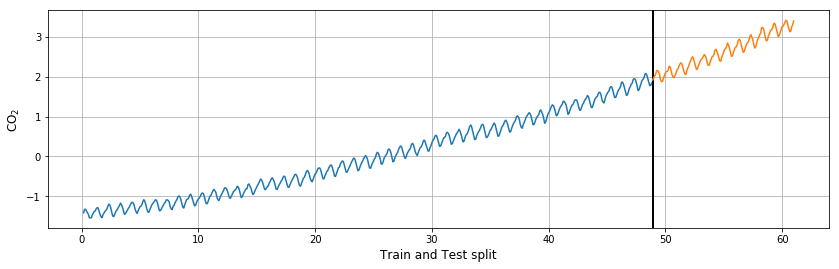

In [8]:
# >>> your code here <<<
X = (df['year'] - 1958).values
y = df['CO2 [ppm]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= False)
scaler = StandardScaler()
y_scaled_train  = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_scaled_test  = scaler.transform(y_test.values.reshape(-1, 1)) 
plt.figure(figsize = (14,4))
plt.xlabel('Train and Test split',fontsize = 12)
plt.ylabel('CO$_2$',fontsize = 12)
plt.plot(X_train,y_scaled_train)
plt.axvline(X_test[0], lw = 2, color = 'black')
plt.plot(X_test, y_scaled_test)
plt.grid(True)
plt.show()

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [9]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score
import GPy.plotting

GP_regression.,value,constraints,priors
sum.rbf.variance,2.3,+ve,
sum.rbf.lengthscale,25.0,+ve,
sum.poly.variance,0.98,+ve,
sum.poly.scale,0.97,+ve,
sum.poly.bias,1.0,+ve,
sum.std_periodic.variance,1.0,+ve,
sum.std_periodic.period,1.0,+ve,
sum.std_periodic.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


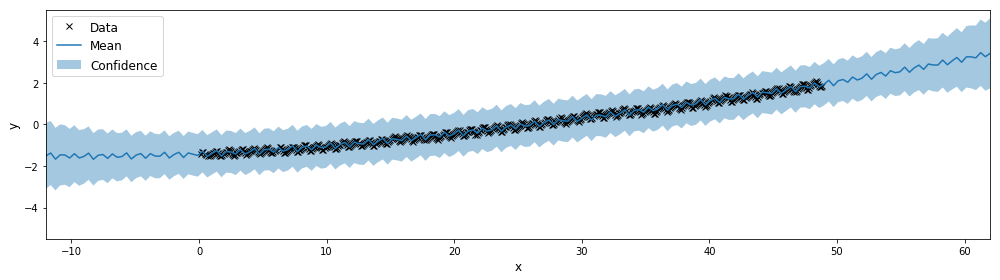

In [39]:
### BEGIN Solution
def plot_model(model, xlim=[-12,62], ylim = [-5.5,5.5]):
    
    x = np.linspace(xlim[0], xlim[1], 200).reshape(-1, 1)
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    plt.figure(figsize = (14,4))
    plt.plot(model.X, model.Y, 'xk', label='Data')
    plt.plot(x, prediction, label='Mean')
    plt.fill_between(x.ravel(), prediction - std,
                     prediction + std, alpha=0.4, label = 'Confidence')
    plt.xlim((xlim[0],xlim[1]))
    plt.ylim((ylim[0],ylim[1]))
    plt.legend(fontsize=12, loc = 0)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.tight_layout()
    
kernel = RBF(1, variance=2.3, lengthscale=25) + Poly(1, variance=0.98, scale=0.97) + StdPeriodic(1)
m = GPRegression(X_train.reshape(-1,1), y_scaled_train, kernel)
display(m)
plot_model(m)


### END Solution

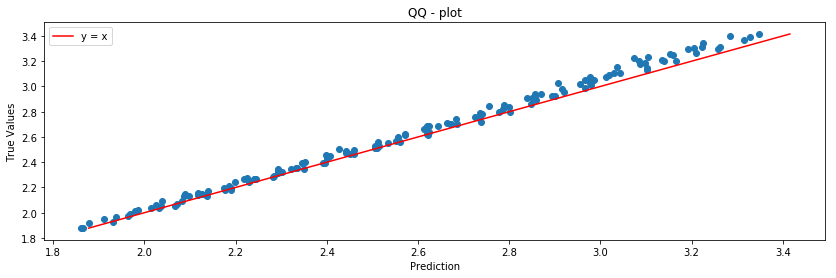

In [40]:
x = np.linspace(min(y_scaled_test),max(y_scaled_test), y_scaled_test.shape[0])
y = np.linspace(min(y_scaled_test),max(y_scaled_test), y_scaled_test.shape[0])
prediction = m.predict(X_test.reshape(-1,1))[0]
plt.figure(figsize = (14,4))
plt.scatter(prediction, y_scaled_test)
plt.plot(x,y, color = 'red', label = 'y = x')
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('QQ - plot')
plt.legend()
plt.show()


In [41]:
r2_score(prediction, y_scaled_test)

0.9829376714569291